### Algorithm Overview

The Traveling Salesman Problem (TSP) is a well-known optimization challenge that seeks to determine the shortest possible route that visits a set of points exactly once and returns to the starting point. In this notebook, we implement a brute-force solution to TSP with a time complexity of \(O(n!)\). This complexity arises from the need to evaluate all possible permutations of the points to find the optimal tour based on the distances calculated from a distance matrix.

The key steps of the notebook include:
1. Loading and preparing the dataset of 2D points.
2. Calculating Euclidean distances between the points to create a distance matrix.
3. Implementing the brute-force TSP algorithm to find the optimal tour and its cost.
4. Measuring the execution time of the entire process, from data preparation to the final computation.
5. (Optional) Visualizing the tour using the `igraph` library.

---

### Conclusion

In this notebook, we successfully implemented the brute-force Traveling Salesman Problem (TSP) algorithm to find the shortest path in a set of 2D points. We calculated the Euclidean distance between each pair of points, generating a distance matrix that was used by the TSP algorithm to assess all possible tours. The algorithm efficiently tracked the minimum path cost and displayed the corresponding route.

While the brute-force method effectively finds the optimal solution for smaller datasets, its factorial time complexity of \(O(n!)\) makes it impractical for larger datasets. Future work could involve exploring heuristic or approximation algorithms to enhance scalability and efficiency. Additionally, optional visualizations with the `igraph` library provide an intuitive representation of the calculated tour.


## 1. Algorithm Overview
### Traveling Salesman Problem (TSP)
The Traveling Salesman Problem (TSP) is a classic optimization problem where the goal is to find the shortest possible route that visits a set of points and returns to the origin point. 
In this notebook, we implement the TSP algorithm using a brute-force approach with a complexity of O(n!). We calculate Euclidean distances between points and measure the algorithm's execution time.


## 2. Importing Necessary Libraries

In [5]:
# Import required libraries for the project
from itertools import permutations
import sys
from datetime import datetime
import time
from termcolor import colored
from math import sqrt

## 3. Traveling Salesman Problem Function
### Traveling Salesman Problem Function
This section defines the main algorithm for solving the Traveling Salesman Problem. It takes a distance matrix and a starting point as input and returns the minimum tour cost.


In [6]:
def travelling_salesman_problem(tourgraph, startpoint):
    """
    This function performs the Traveling Salesman Problem (TSP) algorithm to find the shortest path
    in a graph represented by a distance matrix.
    
    Parameters:
    - tourgraph: NxN array representing distances between N nodes.
    - startpoint: The starting node for the path.
    
    Returns:
    - Minimum cost of the path.
    """
    vertex_count = len(tourgraph)                             # Count of nodes
    vertex_list = []                                         # List for all nodes except the start point
    d = sys.maxsize                                          # Initialize d to infinity
    
    # Populate vertex_list with nodes
    for i in range(vertex_count):
        if i != startpoint:
            vertex_list.append(i)

    # Calculate all permutations of the vertex_list
    for i in permutations(vertex_list):                      
        tour = 0
        k = startpoint
        k2 = []  # Track visited nodes
        
        # Calculate the tour cost for each permutation
        for j in i:
            tour += tourgraph[k][j]
            k2.append(j)
            print(f'{chr(k+97).upper()} ->' if {k} not in k2 else "", end=" ")
            k = j
        tour += tourgraph[k][startpoint]  # Add the cost to return to the start point
        print(f"{chr(k+97).upper()} -> {chr(startpoint+97).upper()}", end=" ")
        print('and the path cost is:  ' + colored(tour, 'yellow'))
        d = min(d, tour)  # Update minimum tour cost
      
    return d


## 4. Euclidean Distance Function
### Calculating Euclidean Distance
We define a function to calculate the Euclidean distance between two points in 2D space. This function is used to build a distance matrix for the TSP algorithm.


In [7]:
def euclidean_distance(row1, row2):
    """
    Calculate the Euclidean distance between two points in 2D space.
    
    Parameters:
    - row1: Coordinates of the first point.
    - row2: Coordinates of the second point.
    
    Returns:
    - Euclidean distance between the two points.
    """
    distance = 0.0
    distance += (((row1[0] - row2[0]) ** 2) + ((row1[1] - row2[1]) ** 2))
    return sqrt(distance)


## 5. Loading and Preparing Data
### Loading Dataset and Preparing the Distance Matrix and Starting the Timer
In this step, we begin by starting a timer to measure the execution time for the entire process. We define a dataset of 2D points, then use the Euclidean distance function to create a distance matrix for the TSP algorithm.

## 6. Running the Traveling Salesman Problem Algorithm
### Running the Traveling Salesman Problem Algorithm
With the distance matrix ready, we run the TSP algorithm, starting from the first point, and print the resulting minimum path cost.


## 7. Measuring Execution Time
### Measuring Execution Time
The timer measures the execution time from the loading of the data through to running the TSP algorithm. This combined approach ensures the process is timed correctly, independent of manual cell execution.



In [8]:
# ***5. Loading and Preparing Data***
# Start timing the execution
start_time = time.time()

# Define the dataset of points
dataset = [[2, 7], [4, 6], [18, 3], [12, 50], [7, 29]]
print("points: ", dataset, "points count: ", len(dataset))

# Initialize distance matrix
matrix_array = []

# Compute the distance matrix
for j in range(len(dataset)):
    row0 = dataset[j]
    distance_list = []
    for row in dataset:
        distance = euclidean_distance(row0, row)
        distance_list.append(distance)
    matrix_array.append(distance_list)


# ***6. Running the Traveling Salesman Problem Algorithm***
# Set the starting point for the TSP
start_point = 0

# Run the Traveling Salesman Problem algorithm
minimum_path_cost = travelling_salesman_problem(matrix_array, start_point)
print('>>>>>>>>>> the TSP minimum path cost is: ' + colored(minimum_path_cost, 'green', attrs=['bold']))


# ***7. Measuring Execution Time***
# End the timer and print execution time
end_time = time.time()
execution_time = end_time - start_time
print('Execution time:', execution_time)

points:  [[2, 7], [4, 6], [18, 3], [12, 50], [7, 29]] points count:  5
A -> B -> C -> D -> E -> A and the path cost is:  108.08338149298454
A -> B -> C -> E -> D -> A and the path cost is:  110.51959072197349
A -> B -> D -> C -> E -> A and the path cost is:  145.13107526176728
A -> B -> D -> E -> C -> A and the path cost is:  113.26807160187533
A -> B -> E -> C -> D -> A and the path cost is:  145.19099448518918
A -> B -> E -> D -> C -> A and the path cost is:  110.89178159630828
A -> C -> B -> D -> E -> A and the path cost is:  119.67966460602265
A -> C -> B -> E -> D -> A and the path cost is:  119.73958382944454
A -> C -> D -> B -> E -> A and the path cost is:  154.35106836923833
A -> C -> D -> E -> B -> A and the path cost is:  110.89178159630826
A -> C -> E -> B -> D -> A and the path cost is:  156.7872775982273
A -> C -> E -> D -> B -> A and the path cost is:  113.26807160187533
A -> D -> B -> C -> E -> A and the path cost is:  153.97887749490354
A -> D -> B -> E -> C -> A and th

## 8. (Optional) Graph Plotting
### (Optional) Graph Plotting with iGraph
In this section, we visualize the points and the paths generated by the Traveling Salesman Problem (TSP) algorithm. We will create an undirected graph to represent the connections between the points and highlight the minimum path found.


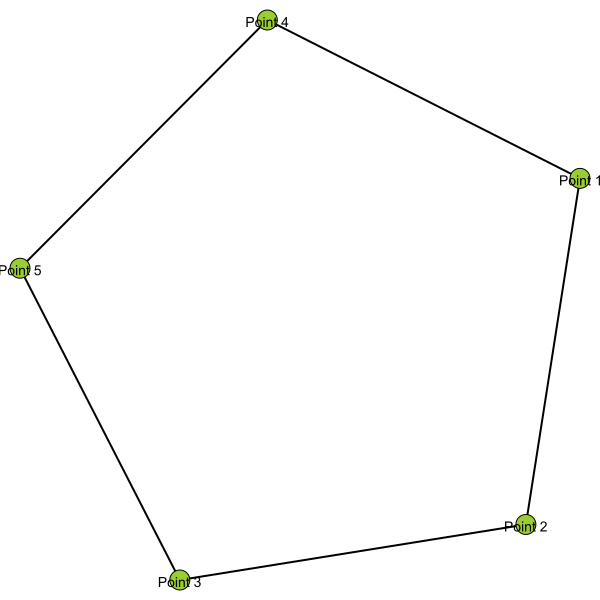

In [11]:
from igraph import Graph, plot

# Define vertices based on your dataset
vertices = [f"Point {i+1}" for i in range(len(dataset))]

# Create edges based on the TSP paths output
# Here, we'll consider the minimum path from the output
# Assuming the minimum path is stored as a list of indices (for example, [0, 1, 2, 4, 3, 0])
# Replace this example with the actual path from your TSP result

# Example minimum path (replace this with your actual result)
minimum_path = [0, 1, 2, 4, 3, 0]  # Indices of points in the optimal path
edges = [(minimum_path[i], minimum_path[i+1]) for i in range(len(minimum_path)-1)]

# Create a graph from vertices and edges
g = Graph(vertex_attrs={"label": vertices}, edges=edges, directed=False)

# Plot the graph with igraph
plot(g,
     vertex_size=20,
     vertex_color=['yellowgreen'] * len(vertices),
     edge_width=[2] * len(edges),
     edge_color=['black'] * len(edges),
     target='tourgraph.png')
